# APEX Legend Analysis:
### -Project 2 (M9): Working with Web Data

Author: Ruoyu Chen

Github Repository: https://github.com/jc000222/Apexlegend_analysis

# Part 1: XML Parsing
First initialize the class "xml_load" from "xml_related.py".

In [1]:
from src.apex_analysis_package.XML.xml_related import XmlLoad

website='https://apexlegendsstatus.com'
xml_parse = XmlLoad(website)

Take a look at the robot.txt file to see if it has sitemaps.

From the result, 'apexlegendsstatus.com' allows scraping all webpages and provide one Sitemap.

In [2]:
print(xml_parse.robotstxt)

User-agent: *
Allow: /
Sitemap: https://apexlegendsstatus.com/sitemap.xml


Use split() to get the sitemap for next steps use. To make my code more applicable, get_sitemap() will gather all sitemaps in the robots.txt and return a list.

In [3]:
xml_parse.get_sitemap()

['https://apexlegendsstatus.com/sitemap.xml']

Parse the contents of each sitemap into a DataFrame. Function get_sitemap_df() is capable of retuning multiple dataframes in a list.

In [4]:
dataframes=xml_parse.get_sitemap_df()
dataframes[0]

,URL,Last Modified,priority
0,https://apexlegendsstatus.com/,2021-03-07T23:14:09+00:00,1.00
1,https://apexlegendsstatus.com/disclaimer,2021-03-07T23:14:09+00:00,0.80
2,https://apexlegendsstatus.com/how-to-fix/code-100,2021-03-07T23:14:09+00:00,0.80
3,https://apexlegendsstatus.com/how-to-fix/code-net,2021-03-07T23:14:09+00:00,0.80
4,https://apexlegendsstatus.com/how-to-fix/code-...,2021-03-07T23:14:09+00:00,0.80
...,...,...,...
62,https://apexlegendsstatus.com/interactive-map/...,2022-12-30T06:00:00+00:00,0.80
63,https://apexlegendsstatus.com/interactive-map/...,2022-12-30T06:00:00+00:00,0.80
64,https://apexlegendsstatus.com/interactive-map/...,2022-12-30T06:00:00+00:00,0.80
65,https://apexlegendsstatus.com/interactive-map/...,2022-12-30T06:00:00+00:00,0.80


### How I might use the dataset:
The XML returns all the URLs of the website. From this dataframe, we can get to know there may be 67 different pages and the last modified date. I can use this data to select wich data I want to scrape or the data I am interested in and get them from API.

# Part 2: Using an API 
First initialize the class "ApiProcess" from "api_related.py".

An authorization key is needed for this API.

In [5]:
from src.apex_analysis_package.API.api_related import ApiProcess
from src import auth

player_name = 'nndkale'
platform = 'PC'
loader=ApiProcess(auth.auth_key(),player_name,platform)


In this API, the player's uid is used for searching. We need to use player name to search for the player's uid through a API provided.

In [6]:
player_name='nndkale'
uid=loader.get_uid(player_name)

uid: 1005428853696


This API allows you to get a player's statistics using his UID and his platform. In this project I want to get all the legends' statistics. 

The API returns in a json fromat, and using .json() and convert it into dataframe.  The returned JSON file has too many data aggregated inside each columns. Unwrap the data and put the data needed into a dataframe.

In this process, the legend that don't have data are removed. The reason why there is an NaN is that I haven't unlocked those legends therefore no data was recorded.

In [7]:
df_player = loader.get_data(uid)
df_player

,Legend,kills,Damage,Games_played
0,Revenant,40,14659,32
1,Octane,24,9653,30
2,Bloodhound,79,30064,93
3,Caustic,1098,454991,1028
4,Lifeline,179,68135,134
5,Pathfinder,24,13319,44
6,Loba,155,90908,213
7,Rampart,29,11511,35
8,Seer,46,20361,69
9,Mad Maggie,10,5920,19


### How I might use the dataset:
This data has the data of the characters I played. I can use it to analyze which legend I played the most, which legend has the most kill and damage and what is the average kills and damage by each game.

# Part 3: Web Scraping

In this part, we are going to scrape one of the page on apexlegendsstatus.com. It is a page with all 24 legends-pick-rates. The website looks like

<div style="text-align:center">
    <img src="legends-pick-rates.png" alt="Alt text" style="width:50%;" />
</div>
<p style="text-align:center">fig 3-1 legends-pick-rates</p>

check the robot.txt to make sure the website allow scraping.

The result is allow:/, meaning all pages are allowed to scrape.

In [8]:

print(xml_parse.robotstxt)

User-agent: *
Allow: /
Sitemap: https://apexlegendsstatus.com/sitemap.xml


Initialize the scrape class.

In [9]:
from src.apex_analysis_package.Scrape.scraper import Scrape

scrape_webpage='https://apexlegendsstatus.com/game-stats/legends-pick-rates'
scraper=Scrape(scrape_webpage)

To scrape the webpage, we need to look at where the data is and how it is stored in the HTML file. Open with F12 to check the HTML elements, the green squares indicate the data we want to scrape from the page and the red squares indicte the tag we are looking for when we use beautiful soup. 

The data of each legend is stored in the tag "legends-banner__content" and different legends are stored in different "legends-banner__item" tag, and all legends are stored in the tag "legends-banner"

<div style="text-align:center">
    <img src="./legends-pick-rates-analysis.png" alt="Alt text" style="width:90%;" />
</div>
<p style="text-align:center">fig 3-2 legends-pick-rates html analysis</p>

Scrape the data of all 24 legends and

scrape the data from the request.get and turn them into a dataframe.

In [10]:
df_legend=scraper.get_df()
df_legend

,Legend,Pick Rate,Change,Avg Rank,Avg Level
24,Seer,0.7,0.92,3,369
22,Gibraltar,1.4,-0.71,4,385
21,Ballistic,1.7,-5.06,4,415
19,Vantage,1.8,1.98,4,441
17,Caustic,2.1,0.59,4,463
15,Ash,2.3,0.59,4,390
23,Crypto,1.1,9.25,4,434
11,Mirage,2.7,-9.09,4,485
0,Octane,9.1,2.77,4,406
7,Bloodhound,5.5,4.14,4,344


### How I might use the dataset:
This data is the select rate, the rate change in 7 days, average rank of the legend and average rank of the legend. In this data we can get the most popular legend, or get the recently popular legend and the data of each legend.

# Part 4: Analyze dataset

#### 4.1 player statistics analysis

Let's see the dataframe again

In [11]:
df_player

,Legend,kills,Damage,Games_played
0,Revenant,40,14659,32
1,Octane,24,9653,30
2,Bloodhound,79,30064,93
3,Caustic,1098,454991,1028
4,Lifeline,179,68135,134
5,Pathfinder,24,13319,44
6,Loba,155,90908,213
7,Rampart,29,11511,35
8,Seer,46,20361,69
9,Mad Maggie,10,5920,19


First initialize the class "ApiProcess" from "api_related.py".

In [12]:
from src.apex_analysis_package.Analysis.EDA import Analysis
runner=Analysis(df_player,df_legend)

get a overview of dataframe.

Can see the different kills, damage and games played for each legends.

The total legends played is 10/25.
The mean of kills of all legends 168 and games played is 169.
Amoung all legends, Caustic is the most played hero, which has 1028 played games and 1098 kills.

In [13]:
df_player.describe()

,kills,Damage,Games_played
count,10.000000,10.000000,10.000000
mean,168.400000,71952.100000,169.700000
std,331.684991,137486.901281,307.495998
min,10.000000,5920.000000,19.000000
25%,25.250000,11963.000000,32.750000
50%,43.000000,17510.000000,56.500000
75%,136.000000,58617.250000,123.750000
max,1098.000000,454991.000000,1028.000000


Plot a bar chart of the data. It is pretty obvious that Caustic is the legend that has the most kills, damage and games played.

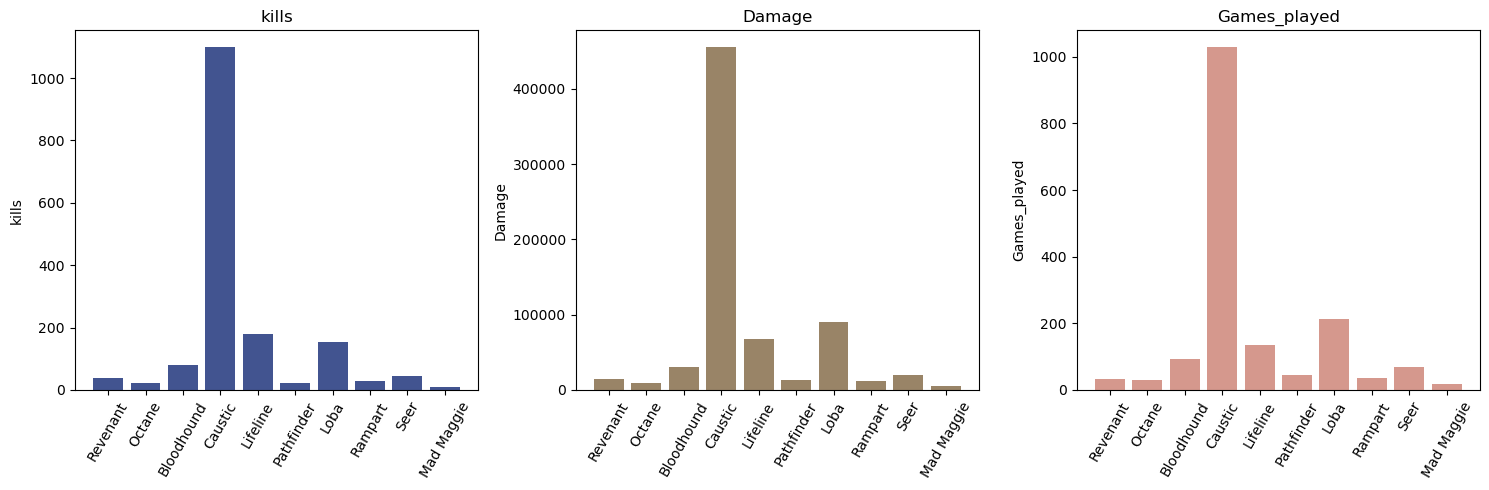

In [14]:
runner.run_analysis('df_player')

Let's do another analysis on kills per game and damage per game. From these cahrts we can conclude that I may be good at playing Revenant, Lifeline and Caustic.

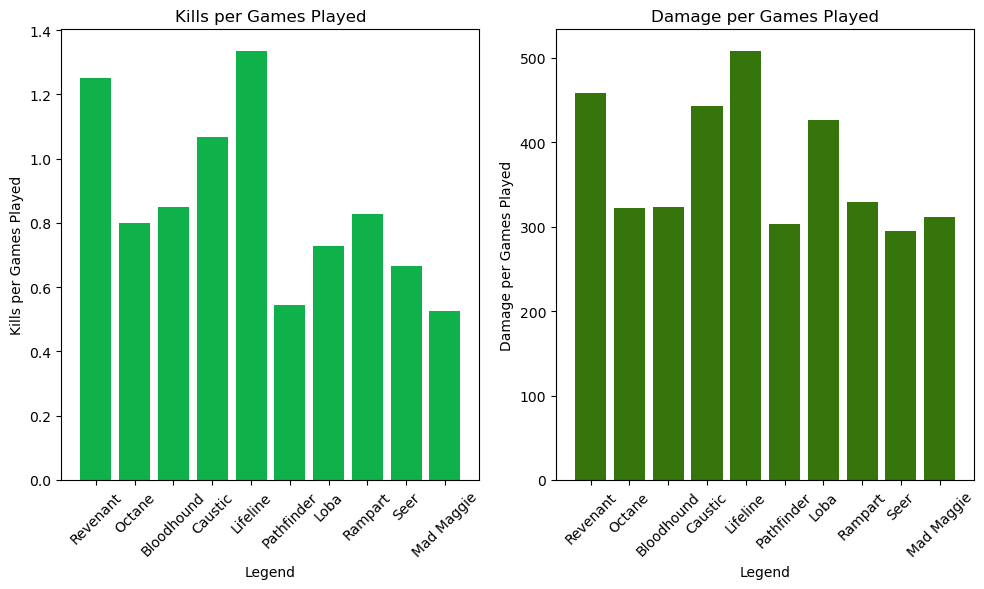

In [15]:
runner.per_game()

chart 4-1, 4-2, 4-3

Let's review the scraped data.

In [16]:
df_legend

,Legend,Pick Rate,Change,Avg Rank,Avg Level
24,Seer,0.7,0.92,3,369
22,Gibraltar,1.4,-0.71,4,385
21,Ballistic,1.7,-5.06,4,415
19,Vantage,1.8,1.98,4,441
17,Caustic,2.1,0.59,4,463
15,Ash,2.3,0.59,4,390
23,Crypto,1.1,9.25,4,434
11,Mirage,2.7,-9.09,4,485
0,Octane,9.1,2.77,4,406
7,Bloodhound,5.5,4.14,4,344


Get an overview of the scraped data. The average pick rate is 4% which match the 25 legends.

In [17]:
df_legend.describe()

,Pick Rate,Change,Avg Rank,Avg Level
count,25.00000,25.000000,25.000000,25.000000
mean,3.99200,0.074400,4.640000,441.960000
std,2.68125,7.267343,0.994987,42.646297
min,0.70000,-23.570000,3.000000,344.000000
25%,1.90000,0.590000,4.000000,415.000000
50%,2.60000,1.800000,4.000000,444.000000
75%,6.20000,3.890000,5.000000,463.000000
max,9.10000,9.250000,7.000000,519.000000


The legend pick rate dataframe need more transform, from string to actual numbers.

Can see the pick rate, change in 7 days, rank and level average of all 24 legends.

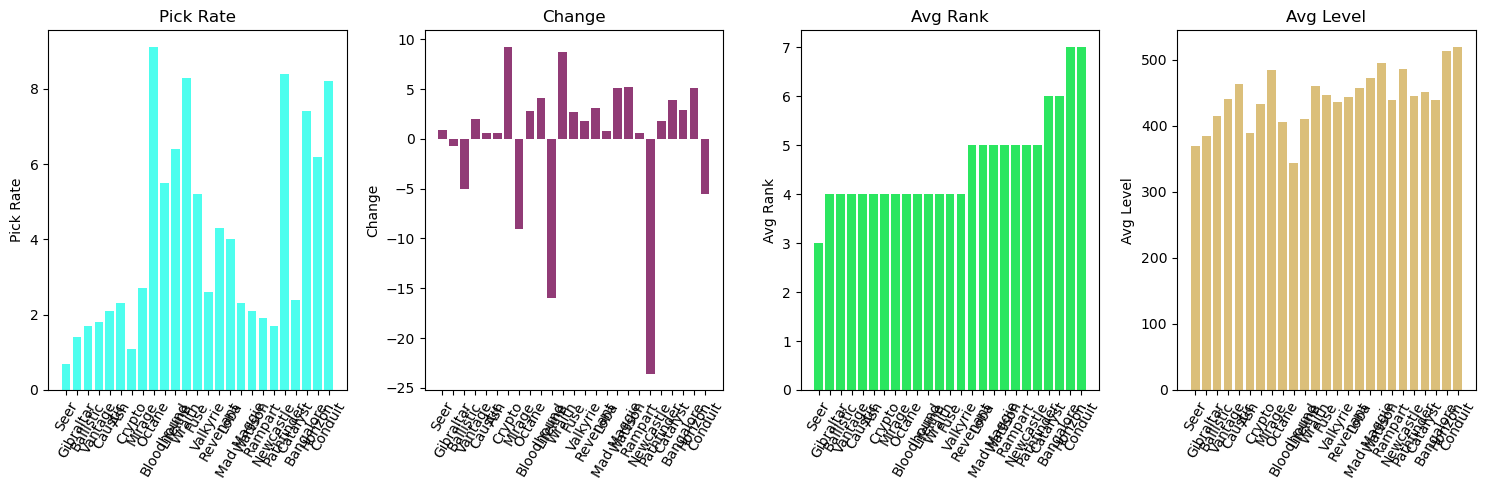

In [18]:
runner.run_analysis('df_legend')

chart 4-4, 4-5, 4-6, 4-7

### Questions to be answered:
Which Legends have had the most significant positive or negative changes in their "Pick Rate"?
How do the "Change" values correlate with "Avg Rank" or "Avg Level" changes?
Compare the "Pick Rate" among Legends to identify the most and least popular ones?

# Extra: Selenium
First initialize the class Account_progress

In [3]:
from src.apex_analysis_package.Selenium.Selenium import Account_progress

account_level= '100'
Purchased_packs = '180'
play_since_season = '17'

dyn_scraper = Account_progress(account_level,Purchased_packs,play_since_season)

Method use_selenium() will help you to fill in all the numbers and check the boxes for you for all the seasons you have played and return the current progress of your account.

Though this is not a scraping of dataset, but still a little practice on selenium.

In [4]:
dyn_scraper.use_selenium()

100%|██████████| 2/2 [00:04<00:00,  2.38s/it]


'267 / 500 (53.4%)'

# Part 5: Reference
1. https://apexlegendsapi.com/#query-by-uid
2. https://apexlegendsstatus.com